In [0]:
!pip install --verbose mlops_with_databricks-0.0.1-py3-none-any.whl

Using pip 23.2.1 from /local_disk0/.ephemeral_nfs/envs/pythonEnv-d39f7629-c4fa-4151-87f5-86e31e3413e7/lib/python3.11/site-packages/pip (python 3.11)
Processing ./mlops_with_databricks-0.0.1-py3-none-any.whl
  Obtaining dependency information for lightgbm<5,>=4.5.0 from https://files.pythonhosted.org/packages/4e/19/1b928cad70a4e1a3e2c37d5417ca2182510f2451eaadb6c91cd9ec692cae/lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl.metadata
  Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
  Obtaining dependency information for scikit-learn<2,>=1.5.1 from https://files.pythonhosted.org/packages/49/21/3723de321531c9745e40f1badafd821e029d346155b6c79704e0b7197552/scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Obtaining dependency information for cloudpickle<4,>=3.0.0 from https://files.pythonhosted.org/packages/48/41

In [0]:
%restart_python

In [0]:
import yaml

from house_price.data_processor import DataProcessor
from house_price.price_model import PriceModel
from house_price.utils import plot_feature_importance, visualize_results

# Load configuration
with open("../project_config.yml", "r") as file:
    config = yaml.safe_load(file)

print("Configuration loaded:")
print(yaml.dump(config, default_flow_style=False))

Configuration loaded:
cat_features:
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Neighborhood
- Condition1
- BldgType
- HouseStyle
- RoofStyle
- Exterior1st
- Exterior2nd
- MasVnrType
- Foundation
- Heating
- CentralAir
- SaleType
- SaleCondition
catalog_name: marvelous_mlops
num_features:
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- TotalBsmtSF
- GrLivArea
- GarageCars
- GarageArea
parameters:
  learning_rate: 0.01
  max_depth: 6
  n_estimators: 1000
schema_name: house_prices
target: SalePrice



In [0]:
# Initialize DataProcessor
data_processor = DataProcessor("/Volumes/mlops_dev/house_prices/data/data.csv", config)

# Preprocess the data
data_processor.preprocess_data()

In [0]:
# Split the data
X_train, X_test, y_train, y_test = data_processor.split_data()

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1168, 28)
Test set shape: (292, 28)


In [0]:
# Initialize and train the model
model = PriceModel(data_processor.preprocessor, config)
model.train(X_train, y_train)

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

In [0]:
# Evaluate the model
mse, r2 = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 997622323.0517062
R2 Score: 0.8699374321111754


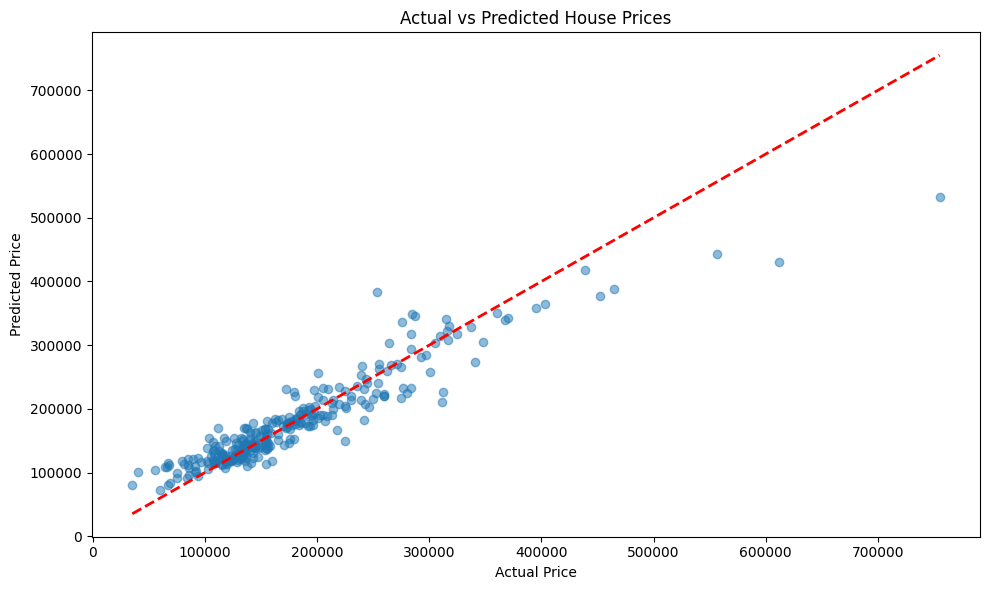

In [0]:
## Visualizing Results
y_pred = model.predict(X_test)
visualize_results(y_test, y_pred)

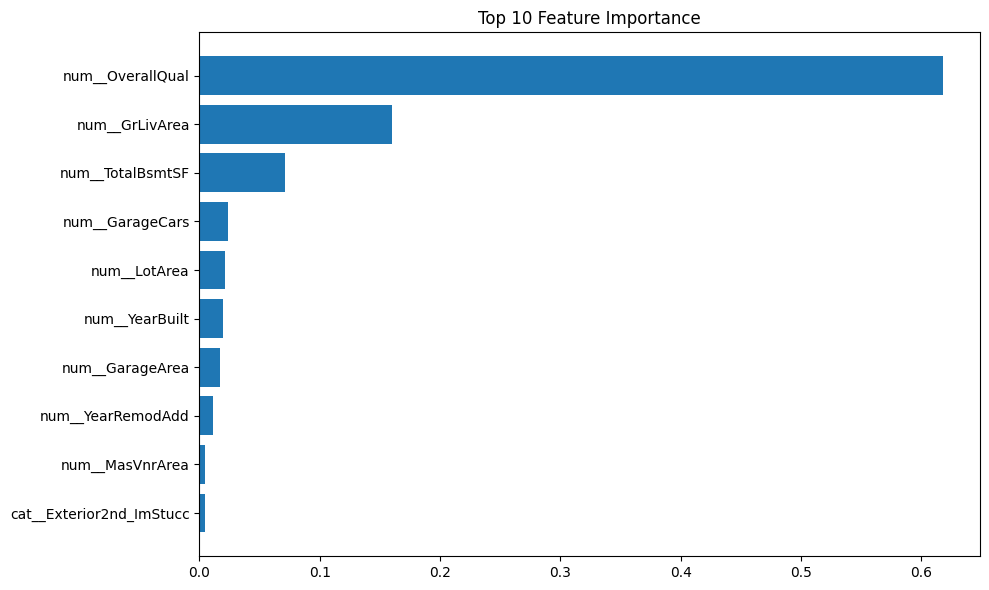

In [0]:
## Feature Importance
feature_importance, feature_names = model.get_feature_importance()
plot_feature_importance(feature_importance, feature_names)